## MetricLearning performance

Evaluate the scaling performance the MetricLearning algorithm using 50 events. 

Change the number of model instances from 1 to 3, beyond which there is out of memory error, and set the number of Athena threads as the same as the number of model instances.

The scaling performance is evaluated by the averaged time taken to run the reconstruction jobs for the 50 events. Only Inner detector is turned on.

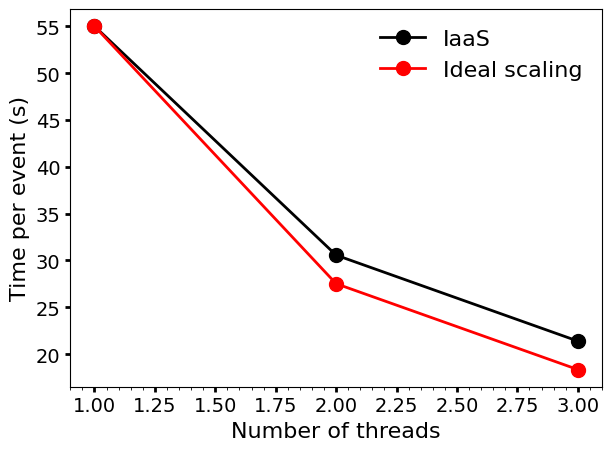

In [2]:
import matplotlib.pyplot as plt

x = [1, 2, 3]
y = [(45 * 60 + 51) / 50, (25 * 60 + 28) / 50, (17 * 60 + 49) / 50]
y2 = [y[0], y[0] / 2, y[0] / 3]
plt.plot(x, y, marker="o", color="black", label="IaaS")
plt.plot(x, y2, marker="o", color="r", label="Ideal scaling")
plt.ylabel("Time per event (s)")
plt.xlabel("Number of threads")
plt.legend()

In [3]:
import math


def add_atlas(ax: plt.Axes, x: float, y: float, fs: int = 12, dx: float = 0.135):
    align_dict = {
        "horizontalalignment": "left",
        "verticalalignment": "bottom",
        "transform": ax.transAxes,
        "fontsize": fs,
        "color": "black",
    }
    ax.text(x, y, "ATLAS", fontweight="heavy", style="italic", **align_dict
            )
    scale_fs = math.sqrt(fs / 12)
    ax.text(x + dx * scale_fs, y, "Simulation", **align_dict)
    ax.text(x + dx * scale_fs + 0.205 * scale_fs, y, "Internal", **align_dict)


def add_text(ax: plt.Axes, x: float, y: float, text: str, fs: int = 12, color: str = "black"):
    align_dict = {
        "horizontalalignment": "left",
        "verticalalignment": "bottom",
        "transform": ax.transAxes,
        "fontsize": fs,
        "color": color,
    }
    ax.text(x, y, text, **align_dict)


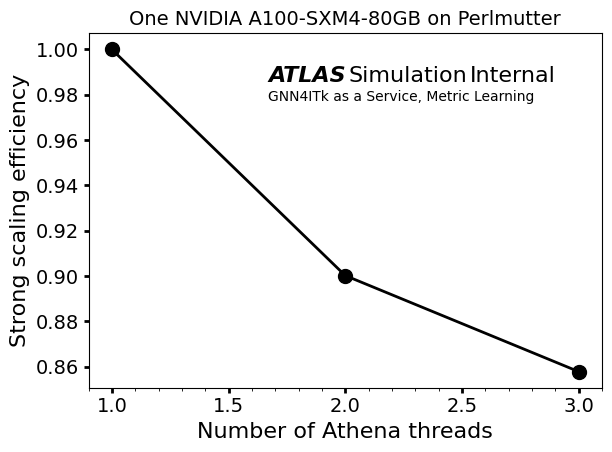

In [4]:
speed_up = [y[0] / y[i] / (i + 1) for i in range(3)]
perfect_speedup = [i + 1 for i in range(3)]

_, ax = plt.subplots()
ax.plot(x, speed_up, marker="o", color="black", label="IAAS")
# ax.set_ylim(0.85, 1.05)

ax.set_ylabel("Strong scaling efficiency")
ax.set_xlabel("Number of Athena threads")

ax.set_title("One NVIDIA A100-SXM4-80GB on Perlmutter", fontsize=14, loc="center")
add_atlas(ax, 0.35, 0.85, 16)
add_text(ax, 0.35, 0.8, "GNN4ITk as a Service, Metric Learning", 10)
plt.savefig("scaling_metric_learning.pdf")
plt.savefig("scaling_metric_learning.png")